<a href="https://colab.research.google.com/github/trishaa4144/cmsc320-final/blob/main/CMSC320_Checkpt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [140]:
income_df = pd.read_csv("us_income_zipcode.csv")
zipcode_borough = pd.read_csv("New_York_State_ZIP_Codes-County_FIPS_Cross-Reference.csv")
df = pd.read_csv("Rat_Sightings_20240917.csv", low_memory=False)


In [141]:
### Dropping all margin of error columns
def drop_margin_cols():
    lst = income_df.columns
    remove_list = []

    for col in lst:
        if "Margin of Error" in col:
            remove_list.append(col)
    return remove_list

lst = drop_margin_cols()
income_df.drop(lst, axis=1, inplace=True)
income_df

,ZIP,Geography,Geographic Area Name,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999",...,"Nonfamily Households $35,000 to $49,999","Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year
0,601,860Z200US00601,ZCTA5 00601,5397.0,33.2,15.7,23.9,13.4,8.7,3.5,...,3.6,0.3,0.9,0.0,0.0,0.0,9386.0,13044.0,15.0,2021.0
1,602,860Z200US00602,ZCTA5 00602,12858.0,27.1,12.7,20.5,14.3,10.9,8.2,...,6.0,3.2,1.8,0.0,0.0,0.0,11242.0,16419.0,20.1,2021.0
2,603,860Z200US00603,ZCTA5 00603,19295.0,32.1,13.4,17.2,9.9,9.3,10.2,...,4.4,4.7,1.1,0.5,0.6,0.2,10639.0,16824.0,34.9,2021.0
3,606,860Z200US00606,ZCTA5 00606,1968.0,28.4,13.3,23.3,15.4,11.0,7.7,...,4.6,3.0,0.0,0.0,0.0,0.0,15849.0,16312.0,13.0,2021.0
4,610,860Z200US00610,ZCTA5 00610,8934.0,20.5,13.2,23.3,15.7,11.5,9.8,...,7.0,3.0,0.0,0.0,0.0,0.0,12832.0,16756.0,14.5,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364993,99923,8600000US99923,ZCTA5 99923,62.0,0.0,6.5,43.5,0.0,33.9,16.1,...,0.0,0.0,0.0,0.0,0.0,0.0,18155.0,17603.0,0.0,2011.0
364994,99925,8600000US99925,ZCTA5 99925,345.0,2.0,4.9,18.0,12.2,13.9,22.3,...,10.9,26.1,0.7,8.7,2.9,0.0,33750.0,45545.0,14.5,2011.0
364995,99926,8600000US99926,ZCTA5 99926,577.0,2.9,6.9,15.4,6.1,28.8,17.0,...,22.4,16.0,0.0,0.0,3.2,0.0,22083.0,34028.0,8.3,2011.0
364996,99927,8600000US99927,ZCTA5 99927,43.0,20.9,27.9,20.9,23.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12813.0,NaN,42.9,2011.0


In [142]:
income_df.drop(["Geography", "Geographic Area Name"], axis=1, inplace=True)
income_df

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $35,000 to $49,999","Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year
0,601,5397.0,33.2,15.7,23.9,13.4,8.7,3.5,0.7,0.9,...,3.6,0.3,0.9,0.0,0.0,0.0,9386.0,13044.0,15.0,2021.0
1,602,12858.0,27.1,12.7,20.5,14.3,10.9,8.2,3.3,2.0,...,6.0,3.2,1.8,0.0,0.0,0.0,11242.0,16419.0,20.1,2021.0
2,603,19295.0,32.1,13.4,17.2,9.9,9.3,10.2,4.1,2.5,...,4.4,4.7,1.1,0.5,0.6,0.2,10639.0,16824.0,34.9,2021.0
3,606,1968.0,28.4,13.3,23.3,15.4,11.0,7.7,0.7,0.3,...,4.6,3.0,0.0,0.0,0.0,0.0,15849.0,16312.0,13.0,2021.0
4,610,8934.0,20.5,13.2,23.3,15.7,11.5,9.8,3.4,1.7,...,7.0,3.0,0.0,0.0,0.0,0.0,12832.0,16756.0,14.5,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364993,99923,62.0,0.0,6.5,43.5,0.0,33.9,16.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18155.0,17603.0,0.0,2011.0
364994,99925,345.0,2.0,4.9,18.0,12.2,13.9,22.3,6.4,18.0,...,10.9,26.1,0.7,8.7,2.9,0.0,33750.0,45545.0,14.5,2011.0
364995,99926,577.0,2.9,6.9,15.4,6.1,28.8,17.0,10.4,8.0,...,22.4,16.0,0.0,0.0,3.2,0.0,22083.0,34028.0,8.3,2011.0
364996,99927,43.0,20.9,27.9,20.9,23.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12813.0,NaN,42.9,2011.0


In [143]:
#Dropping columns we don't need from borough df
zipcode_borough.drop(["State FIPS", "County Code", "File Date", "County FIPS"], axis=1, inplace=True)
zipcode_borough

,County Name,ZIP Code
0,Albany,12007
1,Albany,12009
2,Albany,12023
3,Albany,12041
4,Albany,12045
...,...,...
2538,Yates,14561
2539,Yates,14837
2540,Yates,14842
2541,Yates,14857


In [144]:
#Merging income_df and zipcode_borough
merged_df = income_df.merge(zipcode_borough, left_on="ZIP", right_on="ZIP Code")
merged_df

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name,ZIP Code
0,6390,22.0,0.0,0.0,0.0,31.8,36.4,18.2,0.0,13.6,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2021.0,Suffolk,6390
1,6390,24.0,0.0,0.0,0.0,25.0,41.7,0.0,0.0,20.8,...,0.0,33.3,0.0,0.0,NaN,NaN,0.0,2020.0,Suffolk,6390
2,6390,40.0,0.0,0.0,0.0,15.0,12.5,50.0,0.0,12.5,...,0.0,50.0,0.0,0.0,NaN,NaN,0.0,2019.0,Suffolk,6390
3,6390,73.0,0.0,2.7,0.0,15.1,5.5,30.1,0.0,8.2,...,0.0,25.0,0.0,25.0,NaN,301975.0,25.0,2018.0,Suffolk,6390
4,6390,77.0,0.0,1.3,2.6,0.0,3.9,23.4,0.0,13.0,...,0.0,20.0,0.0,20.0,NaN,239630.0,20.0,2017.0,Suffolk,6390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23875,13845,69.0,0.0,29.0,71.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2015.0,Tioga,13845
23876,13845,60.0,0.0,30.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2014.0,Tioga,13845
23877,13845,58.0,0.0,32.8,67.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2013.0,Tioga,13845
23878,13845,107.0,0.0,18.7,37.4,0.0,43.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17094.0,29875.0,43.9,2012.0,Tioga,13845


In [145]:
#Filtering to only the 5 boroughs of NYC
merged_df = merged_df[(merged_df["County Name"] == "Bronx") | (merged_df["County Name"] == "Queens") | (merged_df["County Name"] == "New York") | (merged_df["County Name"] == "Kings") | (merged_df["County Name"] == "Richmond")]
merged_df

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name,ZIP Code
11,10001,14273.0,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,13.0,15.7,11.4,19.0,89723.0,131592.0,20.1,2021.0,New York,10001
12,10001,13311.0,6.7,4.4,5.1,4.7,6.2,13.0,11.1,14.0,...,12.4,14.4,9.8,19.8,86899.0,132472.0,17.9,2020.0,New York,10001
13,10001,12997.0,8.3,4.4,7.0,4.2,6.2,10.6,11.9,14.1,...,12.2,15.3,10.2,18.3,85785.0,134487.0,17.1,2019.0,New York,10001
14,10001,12431.0,8.8,3.9,7.5,4.2,7.7,11.2,11.0,15.6,...,10.2,16.2,6.9,19.1,81133.0,131058.0,19.1,2018.0,New York,10001
15,10001,12347.0,9.1,4.5,8.4,3.3,8.2,11.5,10.0,15.7,...,8.0,17.1,6.2,19.0,75794.0,145560.0,19.0,2017.0,New York,10001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23805,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,Queens,11425
23806,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,Queens,11425
23807,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,Queens,11425
23808,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,Queens,11425


In [146]:
#Dropping this Mean Income because of the number of NaN values we found (905)
#Dropping ZIP Code cause we don't need it
merged_df.drop(["Married-Couple Families Mean Income (Dollars)", "ZIP Code"], axis=1, inplace=True)
merged_df

C:\Users\sriya\AppData\Local\Temp\ipykernel_50784\3119608215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop(["Married-Couple Families Mean Income (Dollars)", "ZIP Code"], axis=1, inplace=True)


,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name
11,10001,14273.0,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,12.2,13.0,15.7,11.4,19.0,89723.0,131592.0,20.1,2021.0,New York
12,10001,13311.0,6.7,4.4,5.1,4.7,6.2,13.0,11.1,14.0,...,14.2,12.4,14.4,9.8,19.8,86899.0,132472.0,17.9,2020.0,New York
13,10001,12997.0,8.3,4.4,7.0,4.2,6.2,10.6,11.9,14.1,...,11.1,12.2,15.3,10.2,18.3,85785.0,134487.0,17.1,2019.0,New York
14,10001,12431.0,8.8,3.9,7.5,4.2,7.7,11.2,11.0,15.6,...,13.2,10.2,16.2,6.9,19.1,81133.0,131058.0,19.1,2018.0,New York
15,10001,12347.0,9.1,4.5,8.4,3.3,8.2,11.5,10.0,15.7,...,13.8,8.0,17.1,6.2,19.0,75794.0,145560.0,19.0,2017.0,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23805,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,Queens
23806,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,Queens
23807,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,Queens
23808,11425,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,Queens


In [147]:
#Fixing year to make it an int
merged_df["Year"] = merged_df["Year"].astype(int)

#Fixing households to make them ints
merged_df["Households"] = merged_df["Households"].astype(int)
merged_df

C:\Users\sriya\AppData\Local\Temp\ipykernel_50784\1544684451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Year"] = merged_df["Year"].astype(int)
C:\Users\sriya\AppData\Local\Temp\ipykernel_50784\1544684451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Households"] = merged_df["Households"].astype(int)


,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name
11,10001,14273,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,12.2,13.0,15.7,11.4,19.0,89723.0,131592.0,20.1,2021,New York
12,10001,13311,6.7,4.4,5.1,4.7,6.2,13.0,11.1,14.0,...,14.2,12.4,14.4,9.8,19.8,86899.0,132472.0,17.9,2020,New York
13,10001,12997,8.3,4.4,7.0,4.2,6.2,10.6,11.9,14.1,...,11.1,12.2,15.3,10.2,18.3,85785.0,134487.0,17.1,2019,New York
14,10001,12431,8.8,3.9,7.5,4.2,7.7,11.2,11.0,15.6,...,13.2,10.2,16.2,6.9,19.1,81133.0,131058.0,19.1,2018,New York
15,10001,12347,9.1,4.5,8.4,3.3,8.2,11.5,10.0,15.7,...,13.8,8.0,17.1,6.2,19.0,75794.0,145560.0,19.0,2017,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23805,11425,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Queens
23806,11425,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,Queens
23807,11425,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,Queens
23808,11425,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,Queens


In [148]:
#No more NA values!!!
merged_df.dropna()

,ZIP,Households,"Households Less Than $10,000","Households $10,000 to $14,999","Households $15,000 to $24,999","Households $25,000 to $34,999","Households $35,000 to $49,999","Households $50,000 to $74,999","Households $75,000 to $99,999","Households $100,000 to $149,999",...,"Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year,County Name
11,10001,14273,7.2,3.4,5.4,3.3,7.4,11.5,11.2,14.9,...,12.2,13.0,15.7,11.4,19.0,89723.0,131592.0,20.1,2021,New York
12,10001,13311,6.7,4.4,5.1,4.7,6.2,13.0,11.1,14.0,...,14.2,12.4,14.4,9.8,19.8,86899.0,132472.0,17.9,2020,New York
13,10001,12997,8.3,4.4,7.0,4.2,6.2,10.6,11.9,14.1,...,11.1,12.2,15.3,10.2,18.3,85785.0,134487.0,17.1,2019,New York
14,10001,12431,8.8,3.9,7.5,4.2,7.7,11.2,11.0,15.6,...,13.2,10.2,16.2,6.9,19.1,81133.0,131058.0,19.1,2018,New York
15,10001,12347,9.1,4.5,8.4,3.3,8.2,11.5,10.0,15.7,...,13.8,8.0,17.1,6.2,19.0,75794.0,145560.0,19.0,2017,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4673,11697,1496,2.3,2.3,4.0,5.1,10.4,18.1,6.9,23.7,...,26.3,0.0,15.6,1.6,8.4,53142.0,82803.0,34.3,2016,Queens
4675,11697,1584,1.1,2.9,9.4,6.9,10.8,14.5,14.3,18.9,...,24.2,5.4,7.9,1.9,4.6,42768.0,66388.0,37.5,2014,Queens
4676,11697,1701,1.2,2.0,10.4,6.4,8.2,12.9,17.9,21.1,...,19.5,10.6,5.9,1.9,4.2,42500.0,62577.0,32.2,2013,Queens
4677,11697,1742,1.3,1.3,11.1,5.2,8.0,13.0,20.4,20.5,...,19.8,12.6,4.5,2.0,0.0,39722.0,47809.0,30.6,2012,Queens


In [149]:
df = df[['Created Date', 'Location Type', 'Incident Zip', 'Community Board', 'Borough', 'Latitude', 'Longitude']]
unique_location_types = df['Location Type'].unique()

residential_mapping = {
    'Single Room Occupancy (SRO)': 'Single',
    '1-2 Family Dwelling': '1-2 Family Apartment',
    '1-2 FamilyDwelling': '1-2 Family Apartment',
    '3+ Family Apt. Building': '3+ Family',
    '3+ Family Apartment Building': '3+ Family',
    '3+ Family Apt.': '3+ Family',
    '3+Family Apt.': '3+ Family',
    '3+ Family Apt': '3+ Family',
    '1-3 Family Dwelling': '1-3 Family Dwelling',
    '1-3 Family Mixed Use Building': '1-3 Family Mixed',
    '1-2 Family Mixed Use Building': '1-2 Family Mixed',
    '3+ Family Mixed Use Building': '3+ Family Mixed',
    'Private House': 'Private House',
    'Apartment': 'Apartment',
    'Residential Property': 'Residential Property'
}

df['Location Type'] = df['Location Type'].replace(residential_mapping)

residential_df = df[df['Location Type'].isin(residential_mapping.values())]
nonresidential_df = df[~df['Location Type'].isin(residential_mapping.values())]
nonresidential_df = nonresidential_df[~nonresidential_df['Location Type'].isin(['Other', 'Other (Explain Below)'])]

# Basic Data Exploration - residential vs nonresidential pie chart
residential_count = residential_df.shape[0]
nonresidential_count = nonresidential_df.shape[0]

# Convert 'Created Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Extract month, week, and day information
df['Month'] = df['Created Date'].dt.month
df['Week'] = df['Created Date'].dt.isocalendar().week
df['Day'] = df['Created Date'].dt.day


df = df[df['Borough'] != 'Unspecified']
df.reset_index(drop=True, inplace=True)

df.dropna(subset=['Created Date', 'Location Type', 'Incident Zip', 'Community Board', 'Borough', 'Latitude', 'Longitude'], inplace=True)
df.drop_duplicates(inplace=True)

In [150]:
df

,Created Date,Location Type,Incident Zip,Community Board,Borough,Latitude,Longitude,Month,Week,Day
0,2024-05-31 00:10:00,Vacant Lot,11377.0,02 QUEENS,QUEENS,40.740375,-73.896454,5,22,31
1,2024-06-01 15:01:00,1-2 Family Apartment,11357.0,07 QUEENS,QUEENS,40.781667,-73.807381,6,22,1
2,2024-06-06 10:08:00,3+ Family,11385.0,05 QUEENS,QUEENS,40.705669,-73.908352,6,23,6
3,2024-06-25 11:34:00,3+ Family,10467.0,07 BRONX,BRONX,40.884066,-73.879225,6,26,25
4,2024-06-27 10:48:00,1-2 Family Apartment,11220.0,07 BROOKLYN,BROOKLYN,40.642061,-74.015862,6,26,27
...,...,...,...,...,...,...,...,...,...,...
253247,2024-05-15 18:38:00,Vacant Lot,10011.0,04 MANHATTAN,MANHATTAN,40.740951,-74.003244,5,20,15
253248,2024-05-15 06:58:00,3+ Family,10029.0,11 MANHATTAN,MANHATTAN,40.796473,-73.936536,5,20,15
253249,2024-05-15 19:29:00,1-2 Family Apartment,11209.0,10 BROOKLYN,BROOKLYN,40.636079,-74.034564,5,20,15
253250,2024-05-15 10:25:00,3+ Family Mixed,10031.0,09 MANHATTAN,MANHATTAN,40.824874,-73.948819,5,20,15


In [151]:
#Making changes to merged_df so that it merges well
merged_df["County Name"] = merged_df["County Name"].replace('Kings', 'BROOKLYN')
merged_df["County Name"] = merged_df["County Name"].replace('Bronx', 'BRONX')
merged_df["County Name"] = merged_df["County Name"].replace('Richmond', 'STATEN ISLAND')
merged_df["County Name"] = merged_df["County Name"].replace('New York', 'MANHATTAN')
merged_df["County Name"] = merged_df["County Name"].replace('Queens', 'QUEENS')
merged_df["County Name"].unique()

C:\Users\sriya\AppData\Local\Temp\ipykernel_50784\1091300862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["County Name"] = merged_df["County Name"].replace('Kings', 'BROOKLYN')
C:\Users\sriya\AppData\Local\Temp\ipykernel_50784\1091300862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["County Name"] = merged_df["County Name"].replace('Bronx', 'BRONX')
C:\Users\sriya\AppData\Local\Temp\ipykernel_50784\1091300862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

array(['MANHATTAN', 'STATEN ISLAND', 'BRONX', 'QUEENS', 'BROOKLYN'],
      dtype=object)

In [152]:
#Making changes to df to merge well
df["Incident Zip"] = df["Incident Zip"].astype(int)
df['Year'] = df['Created Date'].dt.year
df.rename(columns={'Incident Zip': 'ZIP'}, inplace=True)
df

,Created Date,Location Type,ZIP,Community Board,Borough,Latitude,Longitude,Month,Week,Day,Year
0,2024-05-31 00:10:00,Vacant Lot,11377,02 QUEENS,QUEENS,40.740375,-73.896454,5,22,31,2024
1,2024-06-01 15:01:00,1-2 Family Apartment,11357,07 QUEENS,QUEENS,40.781667,-73.807381,6,22,1,2024
2,2024-06-06 10:08:00,3+ Family,11385,05 QUEENS,QUEENS,40.705669,-73.908352,6,23,6,2024
3,2024-06-25 11:34:00,3+ Family,10467,07 BRONX,BRONX,40.884066,-73.879225,6,26,25,2024
4,2024-06-27 10:48:00,1-2 Family Apartment,11220,07 BROOKLYN,BROOKLYN,40.642061,-74.015862,6,26,27,2024
...,...,...,...,...,...,...,...,...,...,...,...
253247,2024-05-15 18:38:00,Vacant Lot,10011,04 MANHATTAN,MANHATTAN,40.740951,-74.003244,5,20,15,2024
253248,2024-05-15 06:58:00,3+ Family,10029,11 MANHATTAN,MANHATTAN,40.796473,-73.936536,5,20,15,2024
253249,2024-05-15 19:29:00,1-2 Family Apartment,11209,10 BROOKLYN,BROOKLYN,40.636079,-74.034564,5,20,15,2024
253250,2024-05-15 10:25:00,3+ Family Mixed,10031,09 MANHATTAN,MANHATTAN,40.824874,-73.948819,5,20,15,2024


In [153]:
merged_df.dropna()
rat_income = df.merge(merged_df, on="ZIP", how="inner")
rat_income

,Created Date,Location Type,ZIP,Community Board,Borough,Latitude,Longitude,Month,Week,Day,...,"Nonfamily Households $50,000 to $74,999","Nonfamily Households $75,000 to $99,999","Nonfamily Households $100,000 to $149,999","Nonfamily Households $150,000 to $199,999","Nonfamily Households $200,000 or More",Nonfamily Households Median Income (Dollars),Nonfamily Households Mean Income (Dollars),Nonfamily Households Nonfamily Income in the Past 12 Months,Year_y,County Name
0,2024-05-31 00:10:00,Vacant Lot,11377,02 QUEENS,QUEENS,40.740375,-73.896454,5,22,31,...,18.3,14.0,10.0,3.9,3.0,48655.0,61845.0,30.3,2021,QUEENS
1,2024-05-31 00:10:00,Vacant Lot,11377,02 QUEENS,QUEENS,40.740375,-73.896454,5,22,31,...,17.1,10.8,9.7,3.7,2.3,44283.0,59071.0,34.5,2020,QUEENS
2,2024-05-31 00:10:00,Vacant Lot,11377,02 QUEENS,QUEENS,40.740375,-73.896454,5,22,31,...,18.6,10.2,10.4,3.8,2.7,45984.0,61366.0,38.1,2019,QUEENS
3,2024-05-31 00:10:00,Vacant Lot,11377,02 QUEENS,QUEENS,40.740375,-73.896454,5,22,31,...,20.5,8.9,9.3,3.8,1.8,43911.0,56980.0,35.7,2018,QUEENS
4,2024-05-31 00:10:00,Vacant Lot,11377,02 QUEENS,QUEENS,40.740375,-73.896454,5,22,31,...,21.3,9.1,8.6,3.7,1.6,43851.0,56124.0,36.5,2017,QUEENS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758028,2023-12-08 10:01:00,Office Building,10115,09 MANHATTAN,MANHATTAN,40.811101,-73.964168,12,49,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,MANHATTAN
2758029,2023-12-08 10:01:00,Office Building,10115,09 MANHATTAN,MANHATTAN,40.811101,-73.964168,12,49,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,MANHATTAN
2758030,2023-12-08 10:01:00,Office Building,10115,09 MANHATTAN,MANHATTAN,40.811101,-73.964168,12,49,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,MANHATTAN
2758031,2023-12-08 10:01:00,Office Building,10115,09 MANHATTAN,MANHATTAN,40.811101,-73.964168,12,49,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,MANHATTAN


In [154]:
rat_income.isna().sum()

Created Date                                                     0
Location Type                                                    0
ZIP                                                              0
Community Board                                                  0
Borough                                                          0
                                                              ... 
Nonfamily Households Median Income (Dollars)                   415
Nonfamily Households Mean Income (Dollars)                     363
Nonfamily Households Nonfamily Income in the Past 12 Months    363
Year_y                                                           0
County Name                                                      0
Length: 67, dtype: int64

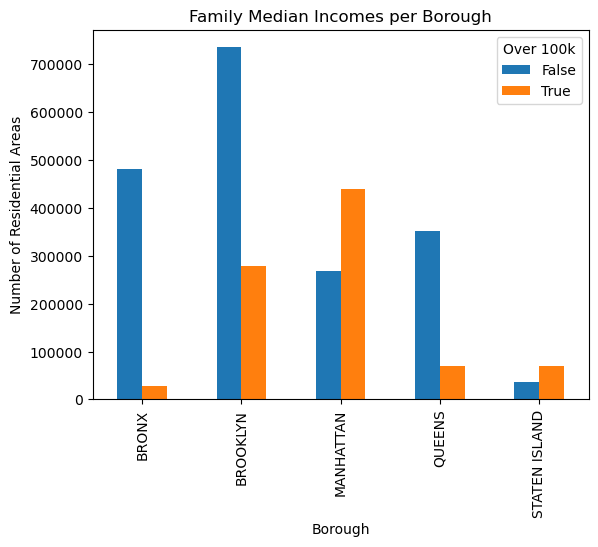

In [157]:
#Getting rid of na values in the median income cols
rat_income.dropna(subset=["Families Median Income (Dollars)", "Married-Couple Families Median Income (Dollars)"])

#creating a col so that we sort over 100k and under 100k salaries
rat_income["Over 100k"] = (rat_income["Families Median Income (Dollars)"] >= 100000) | (rat_income["Married-Couple Families Median Income (Dollars)"] >= 100000)

#Chi-Squared test
contingency = pd.crosstab(rat_income["Borough"], rat_income["Over 100k"])
contingency.plot(kind='bar', stacked=False)

#Plot
plt.xlabel("Borough")
plt.ylabel("Number of Residential Areas")
plt.title("Family Median Incomes per Borough")
plt.show()

In [158]:
chi2_table = stats.chi2_contingency(contingency, correction=False)
chi2_table

Chi2ContingencyResult(statistic=567511.0938596849, pvalue=0.0, dof=4, expected_freq=array([[346101.47157775, 163968.52842225],
       [687524.42913482, 325720.57086518],
       [480146.49620218, 227473.50379782],
       [285375.10598024, 135198.89401976],
       [ 72280.497105  ,  34243.502895  ]]))